In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from numpy.polynomial.chebyshev import Chebyshev

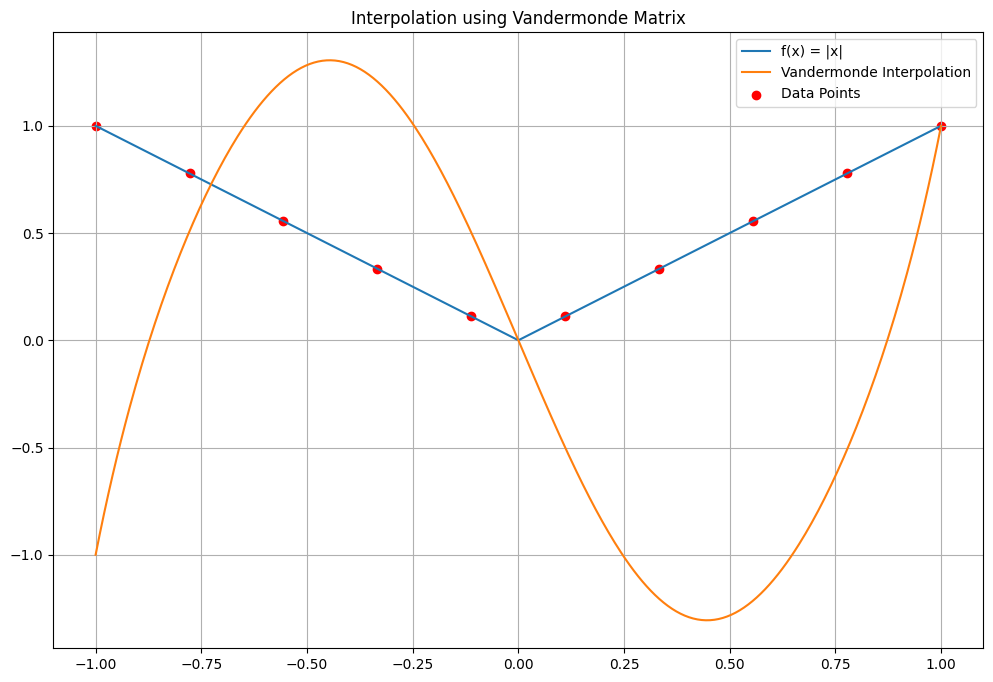

In [23]:
def vandermonde_interpolation(x_vals, y_vals):
    n = len(x_vals)
    V = np.vander(x_vals, increasing=True)
    coeffs = np.linalg.solve(V, y_vals)
    return coeffs

x_vals = np.linspace(-1, 1, 10)
y_vals = np.abs(x_vals)

coeffs_vandermonde = vandermonde_interpolation(x_vals, y_vals)
p_vandermonde = Polynomial(coeffs_vandermonde[::-1])

x_plot = np.linspace(-1, 1, 400)
plt.figure(figsize=(12, 8))
plt.plot(x_plot, np.abs(x_plot), label='f(x) = |x|')
plt.plot(x_plot, p_vandermonde(x_plot), label='Vandermonde Interpolation')
plt.scatter(x_vals, y_vals, color='red', label='Data Points')
plt.title('Interpolation using Vandermonde Matrix')
plt.legend()
plt.grid(True)
plt.show()

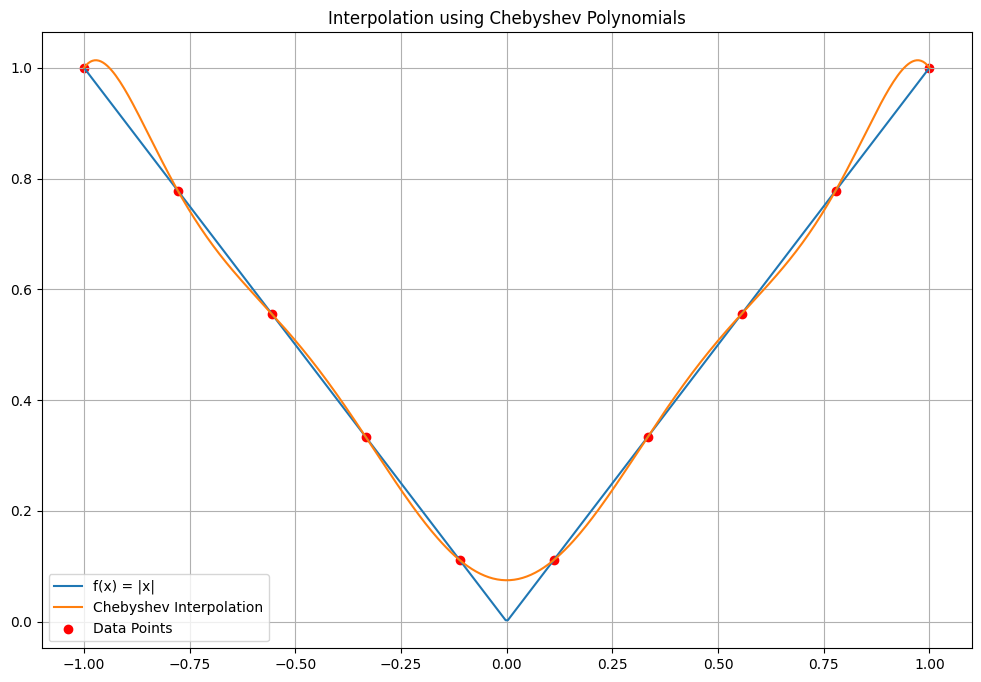

In [22]:
def chebyshev_interpolation(x_vals, y_vals):
    T = Chebyshev.fit(x_vals, y_vals, deg=len(x_vals)-1)
    return T

T_chebyshev = chebyshev_interpolation(x_vals, y_vals)

plt.figure(figsize=(12, 8))
plt.plot(x_plot, np.abs(x_plot), label='f(x) = |x|')
plt.plot(x_plot, T_chebyshev(x_plot), label='Chebyshev Interpolation')
plt.scatter(x_vals, y_vals, color='red', label='Data Points')
plt.title('Interpolation using Chebyshev Polynomials')
plt.legend()
plt.grid(True)
plt.show()

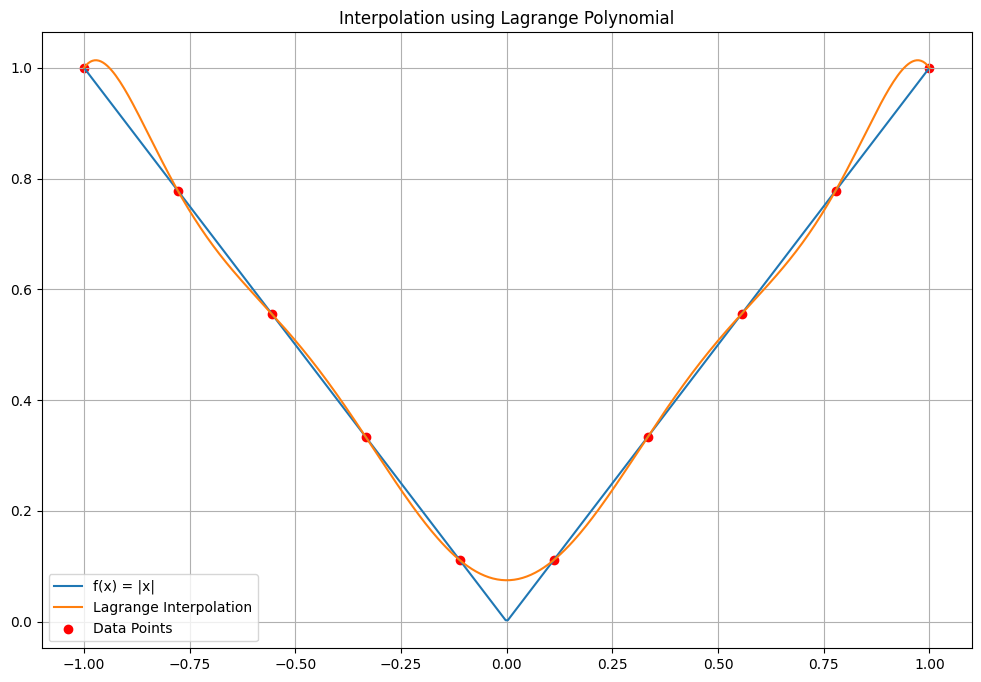

In [21]:
def lagrange_polynomial(x_vals, y_vals, x):
    n = len(x_vals)
    result = 0
    for i in range(n):
        term = y_vals[i]
        for j in range(n):
            if i != j:
                term *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        result += term
    return result

lagrange_vectorized = np.vectorize(lambda x: lagrange_polynomial(x_vals, y_vals, x))

plt.figure(figsize=(12, 8))
plt.plot(x_plot, np.abs(x_plot), label='f(x) = |x|')
plt.plot(x_plot, lagrange_vectorized(x_plot), label='Lagrange Interpolation')
plt.scatter(x_vals, y_vals, color='red', label='Data Points')
plt.title('Interpolation using Lagrange Polynomial')
plt.legend()
plt.grid(True)
plt.show()

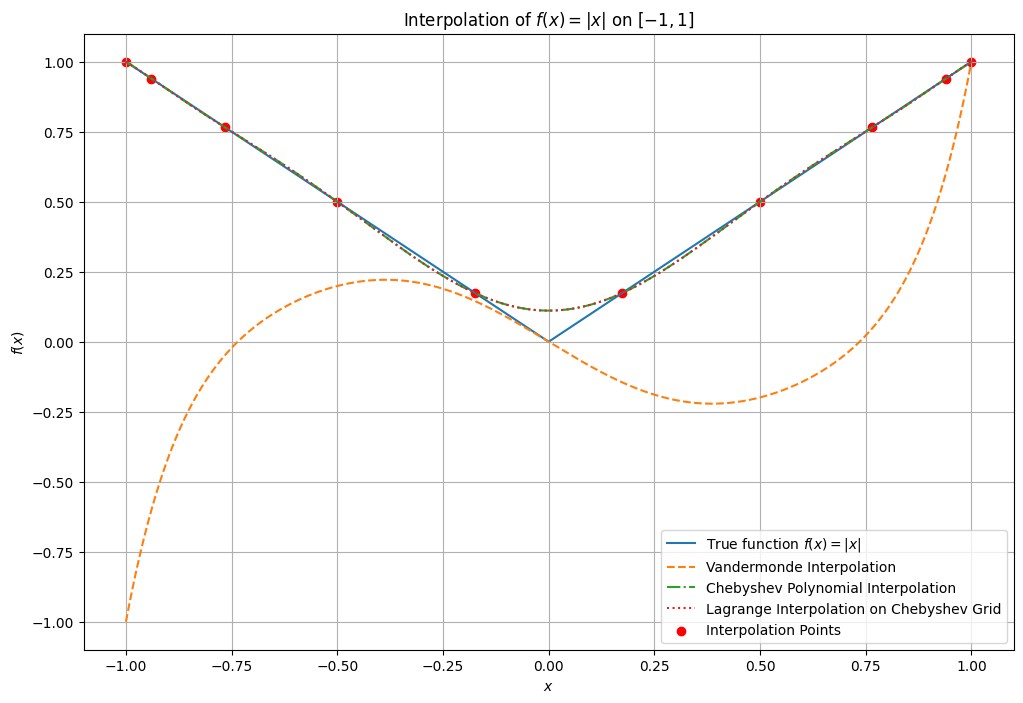

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev as cheb
from scipy.interpolate import lagrange

def f(x):
    return np.abs(x)

n = 10

cheb_nodes = np.cos(np.pi * np.arange(n) / (n - 1))

y_cheb = f(cheb_nodes)

def vandermonde_interpolation(x, nodes, y):
    V = np.vander(nodes)
    coeffs = np.linalg.solve(V, y)
    return np.polyval(coeffs[::-1], x)

def chebyshev_interpolation(x, nodes, y):
    coeffs = cheb.chebfit(nodes, y, len(nodes) - 1)
    return cheb.chebval(x, coeffs)

def lagrange_interpolation(x, nodes, y):
    poly = lagrange(nodes, y)
    return poly(x)

x_fine = np.linspace(-1, 1, 500)

y_vandermonde = vandermonde_interpolation(x_fine, cheb_nodes, y_cheb)
y_cheb_poly = chebyshev_interpolation(x_fine, cheb_nodes, y_cheb)
y_lagrange = lagrange_interpolation(x_fine, cheb_nodes, y_cheb)

plt.figure(figsize=(12, 8))

plt.plot(x_fine, f(x_fine), label='True function $f(x) = |x|$')
plt.plot(x_fine, y_vandermonde, label='Vandermonde Interpolation', linestyle='--')
plt.plot(x_fine, y_cheb_poly, label='Chebyshev Polynomial Interpolation', linestyle='-.')
plt.plot(x_fine, y_lagrange, label='Lagrange Interpolation on Chebyshev Grid', linestyle=':')

plt.scatter(cheb_nodes, y_cheb, color='red', label='Interpolation Points')

plt.title('Interpolation of $f(x) = |x|$ on $[-1, 1]$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()